# Q-Learning
In this notebook, we try to reproduce the plot on slide 31 from [Lecture 6 RL Lecture Series 2021](https://storage.googleapis.com/deepmind-media/UCL%20x%20DeepMind%202021/Lecture%206%20-%20Model-free%20control.pdf)

In [ ]:
import numpy as np

The update function for the Q-table is:

In [ ]:
# Hyperparameters
alpha = 0.01
gamma = 0.99

def update(q, R, a_t, alpha=alpha, gamma=gamma):
    a_optim = np.argmax(q)
    q[a_t] = q[a_t] + alpha * (R + gamma * q[a_optim] - q[a_t])
    return q

Checking that it works:

In [ ]:
q = np.zeros((3,3))
q = update(q, 3, 0, 1, 1)
print(q)

[[3. 3. 3.]
 [0. 0. 0.]
 [0. 0. 0.]]


The reward function is:
- $r=-1$, if the chosen number is incorrect.
- $r=\dfrac{1}{\text{action space}}$, if the chosen number is correct.
- $r=0$, if we stop.

In [ ]:
def random_reward(a, action_space):
    a_reward = np.random.randint(action_space)
    if a == a_reward:
      return 50
    elif a_reward == 0:
      return 0
    else:
      return -1

In [ ]:
action_space = 171
q = np.ones(action_space) *50
q_max = []

def update(q, R, a_t, alpha=alpha, gamma=gamma):
    a_optim = np.argmax(q)
    q[a_t] = q[a_t] + alpha * (R + gamma * q[a_optim] - q[a_t])
    return q

for _ in range(500000):
    a_t = np.random.randint(action_space)
    R = random_reward(a_t, action_space)
    q = update(q, R, a_t)
    q_max.append(np.max(q))

# Double Q-Learning

In [ ]:
q = np.ones(action_space)*50
q2 = np.ones(action_space)*50
q_max_double = []

def update(q, q2, R, a_t, alpha=alpha, gamma=gamma):
    u = np.random.uniform()
    if u > 0.5:
      a_optim = np.argmax(q)
      q[a_t] = q[a_t] + alpha * (R + gamma * q2[a_optim] - q[a_t])
    else:
      a_optim = np.argmax(q2)
      q2[a_t] = q2[a_t] + alpha * (R + gamma * q[a_optim] - q2[a_t])
    return q, q2


for _ in range(500000):
    a_t = np.random.randint(action_space)
    R = random_reward(a_t, action_space)
    q,q2 = update(q,q2, R, a_t)
    q_max_double.append(np.max(q))

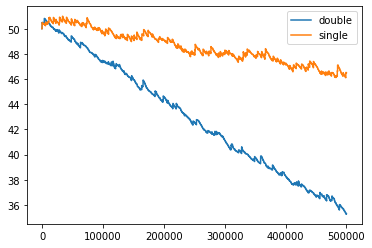

In [ ]:
plt.plot(q_max_double,label='double')
plt.plot(q_max,label='single')
plt.legend()
plt.show()